In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/Assignment3/diabetes.csv'
diabetes_df = pd.read_csv(file_path)
diabetes_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


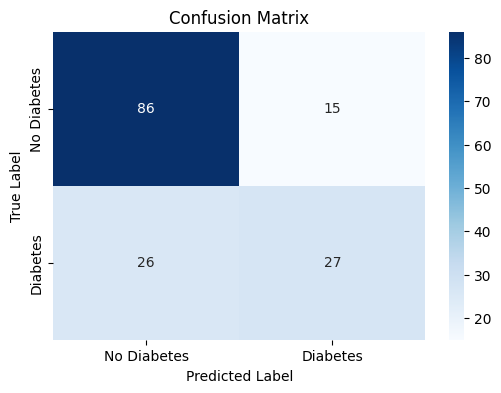

{'Accuracy': 0.7337662337662337,
 'Precision': 0.6428571428571429,
 'Recall': 0.5094339622641509,
 'F1 Score': 0.5684210526315789}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into features and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Perform scaling and standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Displaying the results
metrics_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

metrics_results


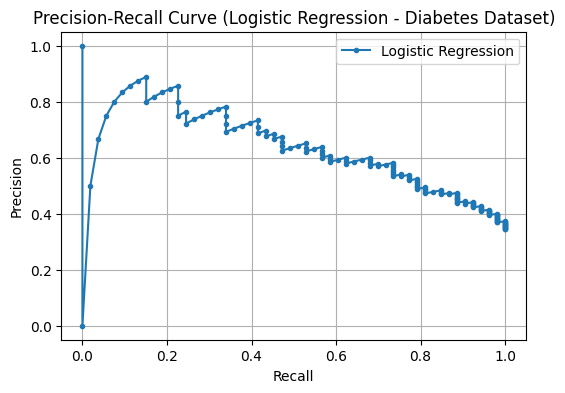

In [ ]:
# Step 1: Import necessary libraries for precision-recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Step 2: Get prediction probabilities from the logistic regression model for the test set
# This is needed to plot the precision-recall curve
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Use the predicted probabilities for class 1 (positive diabetes)

# Step 3: Calculate precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Step 4: Plot the precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.title("Precision-Recall Curve (Logistic Regression - Diabetes Dataset)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


Problem 2

In [ ]:
# Load the cancer dataset
cancer_file_path = '/content/drive/MyDrive/Assignment3/cancer.csv'
cancer_df = pd.read_csv(cancer_file_path)

# Check the first few rows of the cancer dataset
cancer_df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Importing necessary libraries again for the next code
import pandas as pd

# Load the cancer dataset
cancer_file_path = '/content/drive/MyDrive/Assignment3/cancer.csv'
cancer_df = pd.read_csv(cancer_file_path)

# Check the first few rows of the cancer dataset
cancer_df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Without Weight Penalty:
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9387755102040817
F1 Score: 0.968421052631579


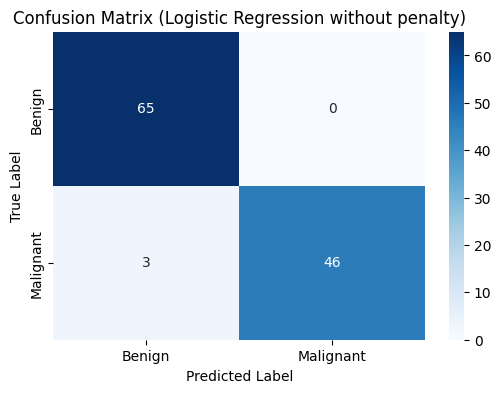

In [ ]:


# Step 3: Clean the dataset (drop unnecessary columns)
cancer_df_cleaned = cancer_df.drop(columns=["id", "Unnamed: 32"])
cancer_df_cleaned['diagnosis'] = cancer_df_cleaned['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Step 4: Split the data into features and target
X_cancer = cancer_df_cleaned.drop('diagnosis', axis=1)
y_cancer = cancer_df_cleaned['diagnosis']

# Step 5: Split into 80% train and 20% test
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=100)

# Step 6: Perform scaling and standardization
scaler = StandardScaler()
X_train_cancer_scaled = scaler.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler.transform(X_test_cancer)

# Step 7: Build and train a logistic regression model without weight penalty
log_reg_cancer = LogisticRegression(max_iter=1000)
log_reg_cancer.fit(X_train_cancer_scaled, y_train_cancer)

# Step 8: Make predictions on the test set
y_pred_cancer = log_reg_cancer.predict(X_test_cancer_scaled)

# Step 9: Calculate and display evaluation metrics
accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)
precision_cancer = precision_score(y_test_cancer, y_pred_cancer)
recall_cancer = recall_score(y_test_cancer, y_pred_cancer)
f1_cancer = f1_score(y_test_cancer, y_pred_cancer)

print(f"Without Weight Penalty:\nAccuracy: {accuracy_cancer}\nPrecision: {precision_cancer}\nRecall: {recall_cancer}\nF1 Score: {f1_cancer}")

# Step 10: Plot confusion matrix without penalty
conf_matrix_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_cancer, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix (Logistic Regression without penalty)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


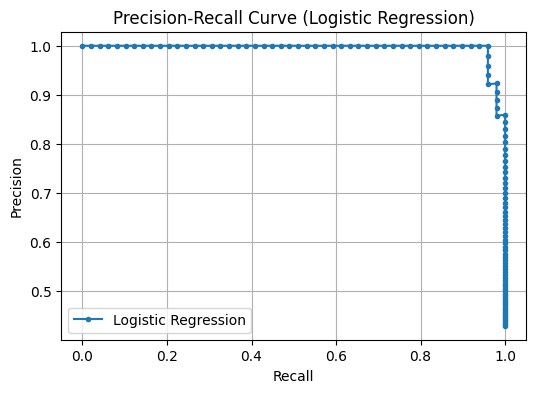

In [ ]:
# Step 1: Import necessary libraries for precision-recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Step 2: Get prediction probabilities (needed for precision-recall curve)
y_proba_cancer = log_reg_cancer.predict_proba(X_test_cancer_scaled)[:, 1]

# Step 3: Calculate precision-recall values
precision, recall, _ = precision_recall_curve(y_test_cancer, y_proba_cancer)

# Step 4: Plot precision-recall curve manually
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


2B

With Weight Penalty (L2 Regularization):
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9387755102040817
F1 Score: 0.968421052631579


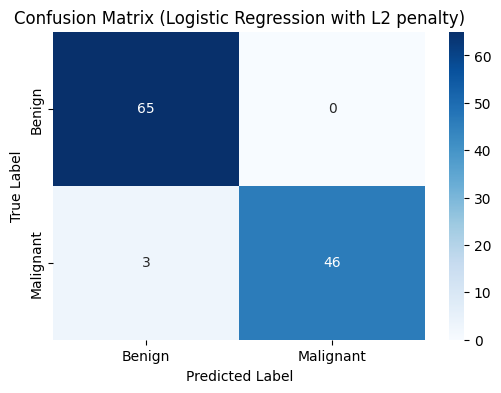

In [ ]:
# Step 1: Import necessary libraries (Already done in 2a)

# Step 2: Build and train a logistic regression model with weight penalty (L2 regularization)
log_reg_cancer_penalty = LogisticRegression(max_iter=1000, penalty='l2')
log_reg_cancer_penalty.fit(X_train_cancer_scaled, y_train_cancer)

# Step 3: Make predictions on the test set with the penalty
y_pred_cancer_penalty = log_reg_cancer_penalty.predict(X_test_cancer_scaled)

# Step 4: Calculate and display evaluation metrics
accuracy_cancer_penalty = accuracy_score(y_test_cancer, y_pred_cancer_penalty)
precision_cancer_penalty = precision_score(y_test_cancer, y_pred_cancer_penalty)
recall_cancer_penalty = recall_score(y_test_cancer, y_pred_cancer_penalty)
f1_cancer_penalty = f1_score(y_test_cancer, y_pred_cancer_penalty)

# Step 5: Print the results with weight penalty
print(f"With Weight Penalty (L2 Regularization):\nAccuracy: {accuracy_cancer_penalty}\nPrecision: {precision_cancer_penalty}\nRecall: {recall_cancer_penalty}\nF1 Score: {f1_cancer_penalty}")

# Step 6: Plot confusion matrix with penalty
conf_matrix_cancer_penalty = confusion_matrix(y_test_cancer, y_pred_cancer_penalty)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_cancer_penalty, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix (Logistic Regression with L2 penalty)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C: 100
Accuracy Score:  0.9649122807017544
Precision Score:  0.9787234042553191
Recall Score:  0.9387755102040817
F1 Score:  0.9583333333333334
Training accuracy: 1.0
Test accuracy: 0.9649122807017544

Coefficients: [[-17.06324648  -0.41176607  -5.37641916   0.          -1.79459784
  -15.44472872  13.79307409  11.60947127  -4.17893976  -2.94202644
    0.68537474  -0.70947537  -2.76910302  61.73207299  -0.06478609
    1.58399949  -4.92230728  13.51271147  -3.7180915  -19.36797152
    0.           9.3610934   35.41326549  -2.50616474   7.55199705
   -5.94057505   2.41612967   0.07951646   8.36627355  19.49137837]]



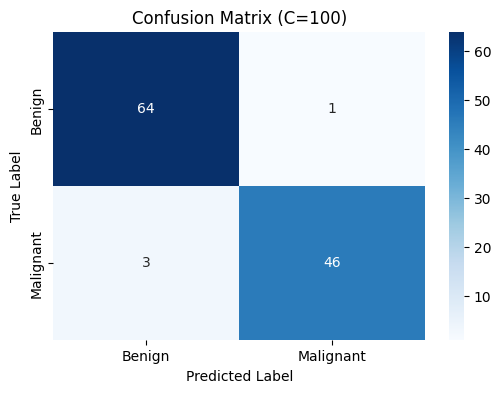

C: 10
Accuracy Score:  0.9649122807017544
Precision Score:  0.9787234042553191
Recall Score:  0.9387755102040817
F1 Score:  0.9583333333333334
Training accuracy: 0.9934065934065934
Test accuracy: 0.9649122807017544

Coefficients: [[-9.32193384e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -4.00746185e+00  3.52320167e+00  3.00540347e+00
  -1.15286285e+00 -4.96264629e-01  1.49398118e+00 -3.02836479e-01
   0.00000000e+00  1.18699163e+01  4.38873763e-01 -1.00377877e-01
  -1.10049426e+00  3.50257427e+00 -8.64063337e-01 -5.57140165e+00
   1.06974624e-02  2.79455386e+00  5.14036244e+00  0.00000000e+00
   1.64535397e+00 -4.56042443e-01  6.18861848e-01  0.00000000e+00
   2.28330591e+00  5.03492436e+00]]



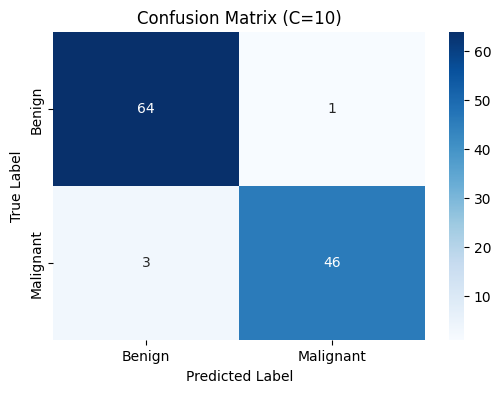

C: 1
Accuracy Score:  0.9649122807017544
Precision Score:  1.0
Recall Score:  0.9183673469387755
F1 Score:  0.9574468085106383
Training accuracy: 0.9912087912087912
Test accuracy: 0.9649122807017544

Coefficients: [[ 0.          0.05930893  0.          0.          0.          0.
   0.52423188  0.89444182  0.         -0.24228531  2.04490158  0.
   0.          1.08621164  0.26616495 -0.90336737  0.          0.
   0.         -0.17823203  0.          1.3954931   1.31607837  2.26906251
   0.64824432  0.          0.57318438  1.47497722  0.62296477  0.        ]]



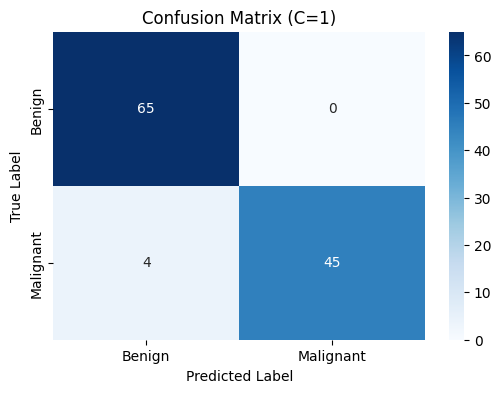

C: 0.1
Accuracy Score:  0.9649122807017544
Precision Score:  1.0
Recall Score:  0.9183673469387755
F1 Score:  0.9574468085106383
Training accuracy: 0.978021978021978
Test accuracy: 0.9649122807017544

Coefficients: [[0.         0.         0.         0.         0.         0.
  0.         0.62490343 0.         0.         0.60493662 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.292594   0.63883039 0.29437811 0.21670417
  0.24377197 0.         0.         0.85625516 0.13214455 0.        ]]



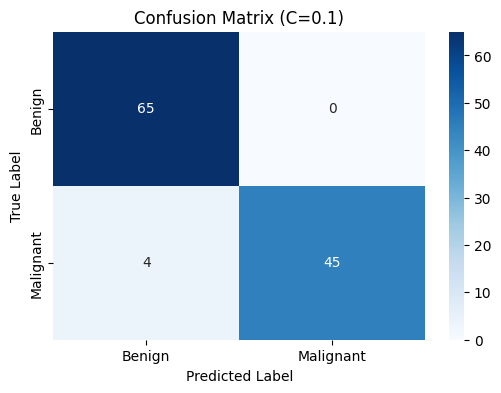

C: 0.01
Accuracy Score:  0.9385964912280702
Precision Score:  0.9038461538461539
Recall Score:  0.9591836734693877
F1 Score:  0.9306930693069307
Training accuracy: 0.9252747252747253
Test accuracy: 0.9385964912280702

Coefficients: [[0.         0.         0.         0.         0.         0.
  0.         0.0746587  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.32335668 0.
  0.         0.         0.         0.37579198 0.         0.        ]]



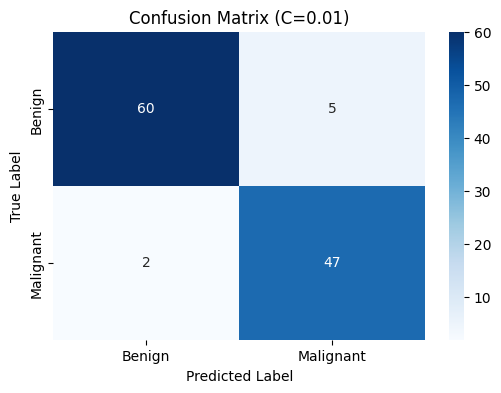

C: 0.001
Accuracy Score:  0.5701754385964912
Precision Score:  0.0
Recall Score:  0.0
F1 Score:  0.0
Training accuracy: 0.6417582417582418
Test accuracy: 0.5701754385964912

Coefficients: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


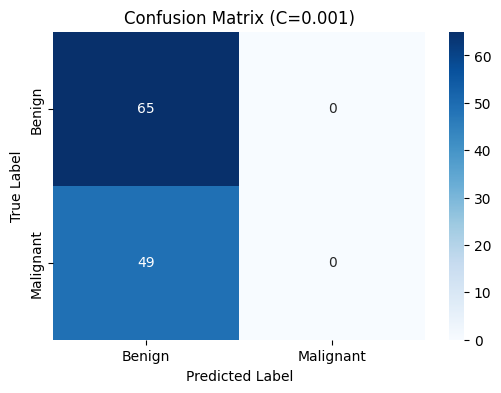

In [ ]:
# Define new C values for experimentation
C_values = [100, 10, 1, 0.1, 0.01, 0.001]

# Loop over different C values and apply L1 regularization
for c in C_values:
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear', max_iter=1000)

    # Train the model
    model.fit(X_train_cancer_scaled, y_train_cancer)

    # Make predictions on the test set
    y_pred_cancer_penalty = model.predict(X_test_cancer_scaled)

    # Calculate and print performance metrics
    print(f'C: {c}')
    print("Accuracy Score: ", accuracy_score(y_test_cancer, y_pred_cancer_penalty))
    print("Precision Score: ", precision_score(y_test_cancer, y_pred_cancer_penalty))
    print("Recall Score: ", recall_score(y_test_cancer, y_pred_cancer_penalty))
    print("F1 Score: ", f1_score(y_test_cancer, y_pred_cancer_penalty))
    print('Training accuracy:', model.score(X_train_cancer_scaled, y_train_cancer))
    print('Test accuracy:', model.score(X_test_cancer_scaled, y_test_cancer))
    print('')

    # Print the coefficients to observe regularization effect
    print('Coefficients:', model.coef_)
    print('')

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_cancer, y_pred_cancer_penalty)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.title(f"Confusion Matrix (C={c})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C: 100
Accuracy Score:  0.9649122807017544
Precision Score:  0.9787234042553191
Recall Score:  0.9387755102040817
F1 Score:  0.9583333333333334
Training accuracy: 1.0
Test accuracy: 0.9649122807017544

Coefficients: [[-1.66072048e+01 -3.97203344e-01 -5.80824227e+00 -7.95230577e-04
  -1.83391147e+00 -1.52479406e+01  1.36447887e+01  1.16150178e+01
  -4.15476223e+00 -2.92791775e+00  5.88297646e-01 -6.78836592e-01
  -2.82024279e+00  6.17888983e+01 -8.17754513e-02  1.50446140e+00
  -4.85275394e+00  1.34441771e+01 -3.70518177e+00 -1.92429354e+01
   0.00000000e+00  9.30747649e+00  3.54232797e+01 -2.67183653e+00
   7.56789497e+00 -5.93449038e+00  2.39639350e+00  9.06005913e-02
   8.34450877e+00  1.93732692e+01]]



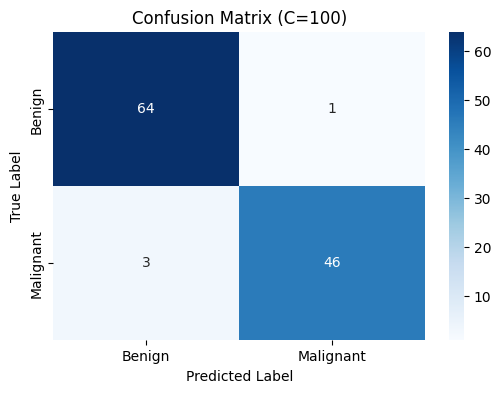

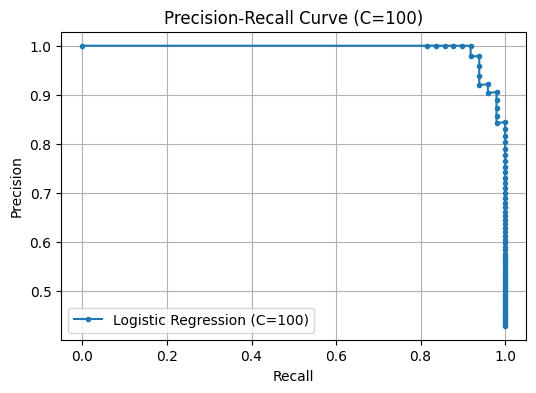

C: 10
Accuracy Score:  0.9649122807017544
Precision Score:  0.9787234042553191
Recall Score:  0.9387755102040817
F1 Score:  0.9583333333333334
Training accuracy: 0.9934065934065934
Test accuracy: 0.9649122807017544

Coefficients: [[-0.91244216  0.          0.          0.          0.         -3.99884059
   3.53768719  2.99765823 -1.15684885 -0.50837684  1.52028871 -0.30430884
   0.         11.86724306  0.44422741 -0.06736404 -1.11199996  3.51331225
  -0.8743207  -5.61882409  0.          2.79804175  5.13061013  0.
   1.64507654 -0.5040287   0.62661067  0.          2.29268505  5.08180532]]



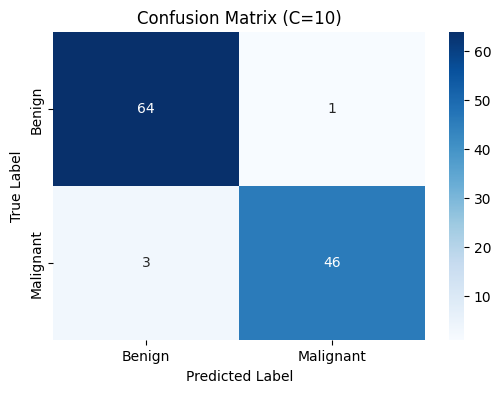

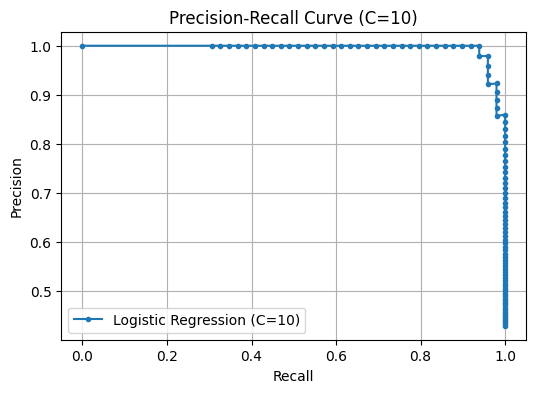

C: 1
Accuracy Score:  0.9649122807017544
Precision Score:  1.0
Recall Score:  0.9183673469387755
F1 Score:  0.9574468085106383
Training accuracy: 0.9912087912087912
Test accuracy: 0.9649122807017544

Coefficients: [[ 0.          0.07887712  0.          0.          0.          0.
   0.62613234  0.81886835  0.         -0.23331735  2.46480421  0.
   0.          0.2710846   0.25708044 -0.83357253  0.          0.
   0.         -0.218356    0.          1.3901163   1.03696893  2.84164603
   0.66777711  0.          0.47729832  1.51675822  0.60953287  0.        ]]



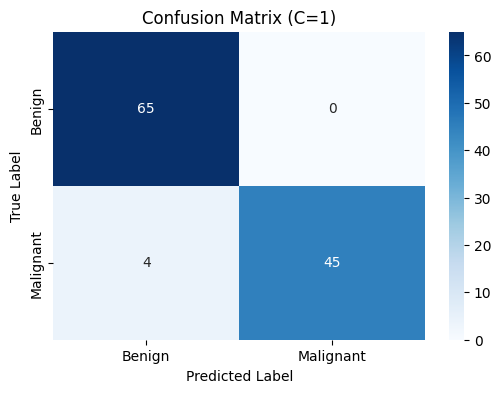

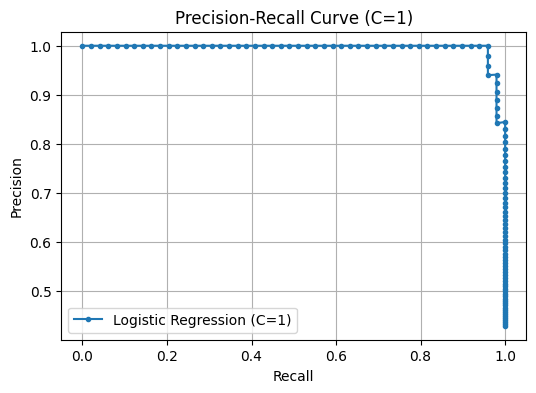

C: 0.1
Accuracy Score:  0.9649122807017544
Precision Score:  1.0
Recall Score:  0.9183673469387755
F1 Score:  0.9574468085106383
Training accuracy: 0.978021978021978
Test accuracy: 0.9649122807017544

Coefficients: [[0.         0.         0.         0.         0.         0.
  0.         0.627227   0.         0.         0.60362826 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.30912636 0.63891937 0.2714478  0.21876948
  0.24296795 0.         0.         0.85803582 0.13218076 0.        ]]



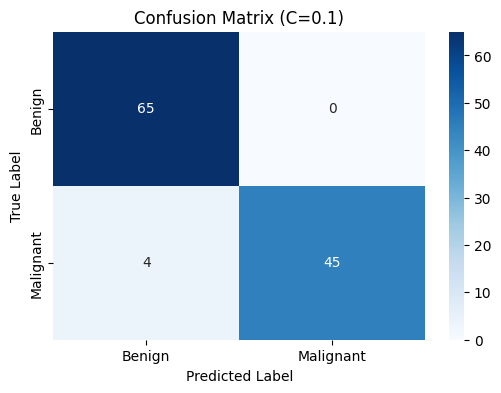

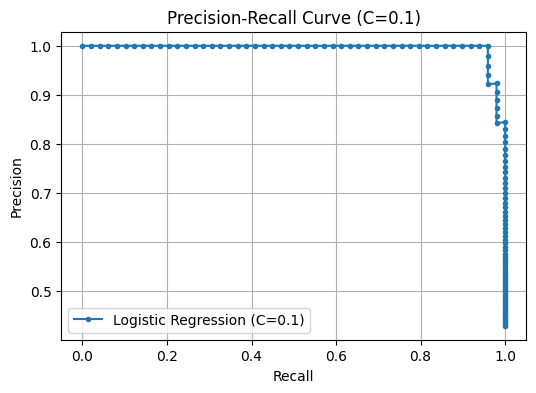

C: 0.01
Accuracy Score:  0.9385964912280702
Precision Score:  0.9038461538461539
Recall Score:  0.9591836734693877
F1 Score:  0.9306930693069307
Training accuracy: 0.9252747252747253
Test accuracy: 0.9385964912280702

Coefficients: [[0.         0.         0.         0.         0.         0.
  0.         0.07506269 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.32323953 0.
  0.         0.         0.         0.37552951 0.         0.        ]]



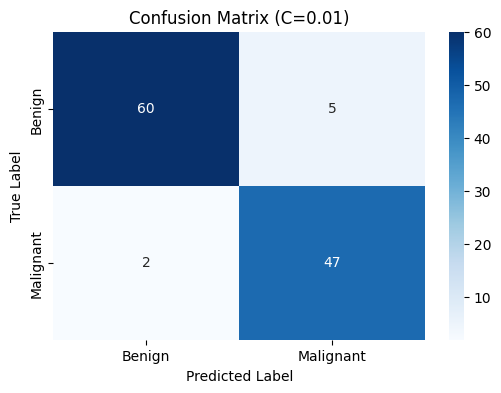

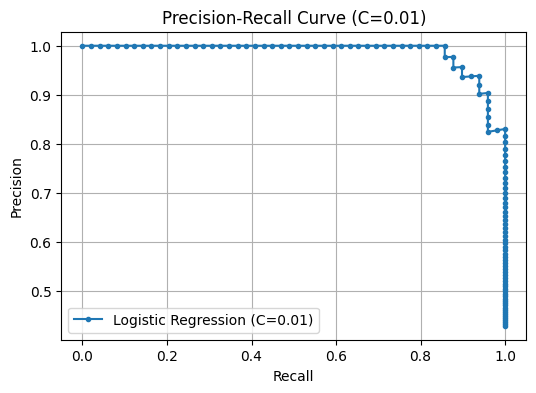

C: 0.001
Accuracy Score:  0.5701754385964912
Precision Score:  0.0
Recall Score:  0.0
F1 Score:  0.0
Training accuracy: 0.6417582417582418
Test accuracy: 0.5701754385964912

Coefficients: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


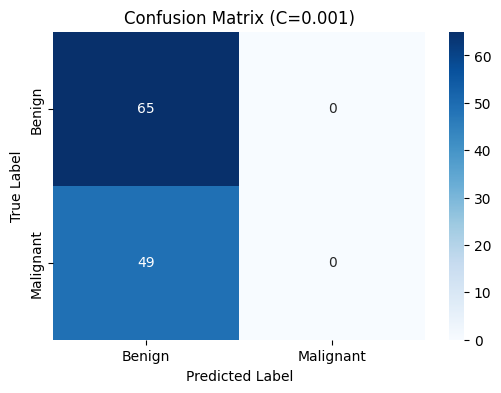

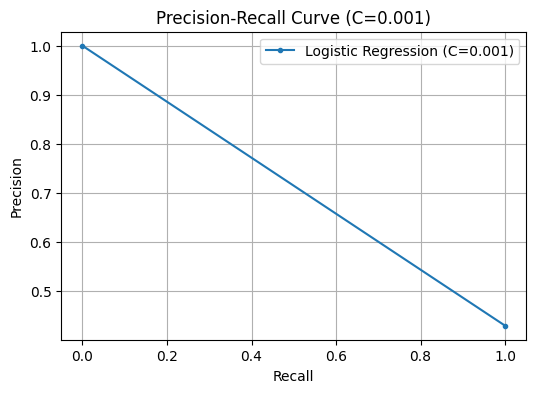

In [ ]:

# Import necessary libraries for precision-recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Define new C values for experimentation
C_values = [100, 10, 1, 0.1, 0.01, 0.001]

# Loop over different C values and apply L1 regularization
for c in C_values:
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear', max_iter=1000)

    # Train the model
    model.fit(X_train_cancer_scaled, y_train_cancer)

    # Make predictions on the test set
    y_pred_cancer_penalty = model.predict(X_test_cancer_scaled)

    # Calculate and print performance metrics
    print(f'C: {c}')
    print("Accuracy Score: ", accuracy_score(y_test_cancer, y_pred_cancer_penalty))
    print("Precision Score: ", precision_score(y_test_cancer, y_pred_cancer_penalty))
    print("Recall Score: ", recall_score(y_test_cancer, y_pred_cancer_penalty))
    print("F1 Score: ", f1_score(y_test_cancer, y_pred_cancer_penalty))
    print('Training accuracy:', model.score(X_train_cancer_scaled, y_train_cancer))
    print('Test accuracy:', model.score(X_test_cancer_scaled, y_test_cancer))
    print('')

    # Print the coefficients to observe regularization effect
    print('Coefficients:', model.coef_)
    print('')

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_cancer, y_pred_cancer_penalty)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.title(f"Confusion Matrix (C={c})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Precision-Recall Curve
    # Get prediction probabilities (needed for precision-recall curve)
    y_proba_cancer = model.predict_proba(X_test_cancer_scaled)[:, 1]

    # Calculate precision-recall values
    precision, recall, _ = precision_recall_curve(y_test_cancer, y_proba_cancer)

    # Plot precision-recall curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.', label=f'Logistic Regression (C={c})')
    plt.title(f"Precision-Recall Curve (C={c})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid(True)
    plt.show()



Problem 3

Naive Bayes Model Results:
Accuracy: 0.9385964912280702
Precision: 0.9565217391304348
Recall: 0.8979591836734694
F1 Score: 0.9263157894736842


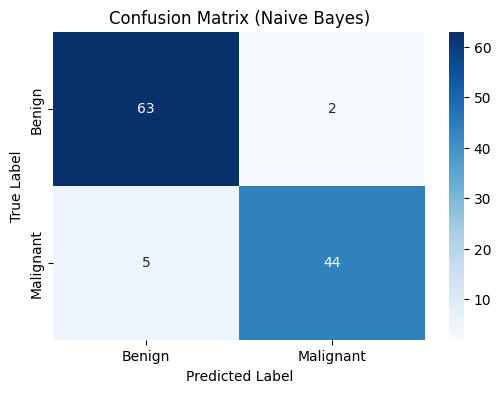


Comparison with Logistic Regression (from Problem 2):
Logistic Regression Accuracy: 0.9736842105263158
Naive Bayes Accuracy: 0.9385964912280702
Logistic Regression Precision: 1.0
Naive Bayes Precision: 0.9565217391304348
Logistic Regression Recall: 0.9387755102040817
Naive Bayes Recall: 0.8979591836734694
Logistic Regression F1 Score: 0.968421052631579
Naive Bayes F1 Score: 0.9263157894736842


In [ ]:
# Step 1: Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Split the data (already scaled and preprocessed from previous steps)
# X_train_cancer_scaled, X_test_cancer_scaled, y_train_cancer, y_test_cancer are already defined

# Step 3: Build and train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_cancer_scaled, y_train_cancer)

# Step 4: Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_cancer_scaled)

# Step 5: Calculate performance metrics
accuracy_nb = accuracy_score(y_test_cancer, y_pred_nb)
precision_nb = precision_score(y_test_cancer, y_pred_nb)
recall_nb = recall_score(y_test_cancer, y_pred_nb)
f1_nb = f1_score(y_test_cancer, y_pred_nb)

# Step 6: Print the performance metrics
print(f"Naive Bayes Model Results:\nAccuracy: {accuracy_nb}\nPrecision: {precision_nb}\nRecall: {recall_nb}\nF1 Score: {f1_nb}")

# Step 7: Plot confusion matrix
conf_matrix_nb = confusion_matrix(y_test_cancer, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 8: Compare the results with logistic regression from Problem 2
print("\nComparison with Logistic Regression (from Problem 2):")
print(f"Logistic Regression Accuracy: {accuracy_cancer}")
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Logistic Regression Precision: {precision_cancer}")
print(f"Naive Bayes Precision: {precision_nb}")
print(f"Logistic Regression Recall: {recall_cancer}")
print(f"Naive Bayes Recall: {recall_nb}")
print(f"Logistic Regression F1 Score: {f1_cancer}")
print(f"Naive Bayes F1 Score: {f1_nb}")


Problem 4

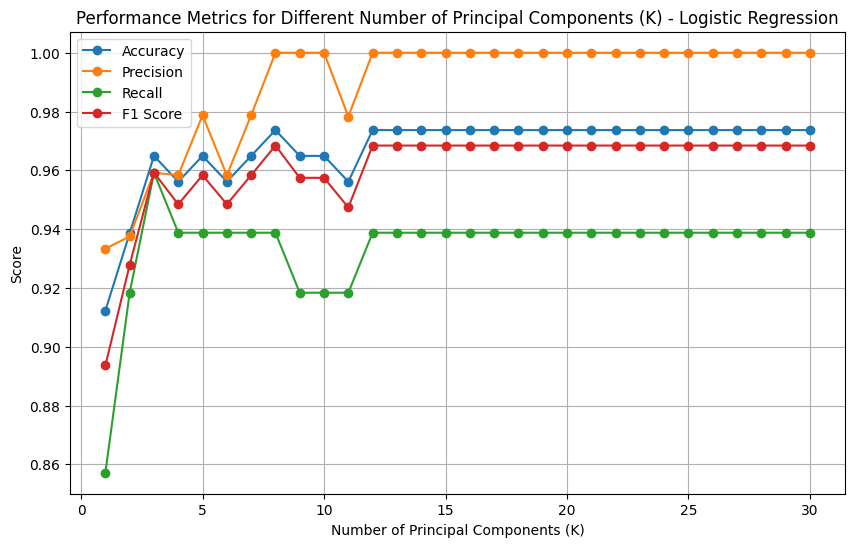

Best number of principal components (K) for highest accuracy using Logistic Regression: 8

Comparison of Logistic Regression with PCA (Problem 4) with Logistic Regression (Problem 2) and Naive Bayes (Problem 3):
Highest Accuracy with Logistic Regression and PCA: 0.9736842105263158
Logistic Regression Accuracy (Problem 2): 0.9736842105263158
Naive Bayes Accuracy (Problem 3): 0.9385964912280702


In [ ]:
# # Step 1: Import necessary libraries
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import matplotlib.pyplot as plt

# # Step 2: Define range of K (number of principal components)
# K_values = list(range(1, X_train_cancer_scaled.shape[1] + 1))  # From 1 to the number of features

# # Step 3: Initialize lists to store performance metrics for different K values
# accuracy_list = []
# precision_list = []
# recall_list = []
# f1_list = []

# # Step 4: Loop over different values of K
# for K in K_values:
#     # Step 5: Apply PCA for feature extraction
#     pca = PCA(n_components=K)
#     X_train_pca = pca.fit_transform(X_train_cancer_scaled)
#     X_test_pca = pca.transform(X_test_cancer_scaled)

#     # Step 6: Build and train a logistic regression model
#     log_reg_pca = LogisticRegression(max_iter=1000)
#     log_reg_pca.fit(X_train_pca, y_train_cancer)

#     # Step 7: Make predictions on the test set
#     y_pred_pca = log_reg_pca.predict(X_test_pca)

#     # Step 8: Calculate performance metrics
#     accuracy_pca = accuracy_score(y_test_cancer, y_pred_pca)
#     precision_pca = precision_score(y_test_cancer, y_pred_pca)
#     recall_pca = recall_score(y_test_cancer, y_pred_pca)
#     f1_pca = f1_score(y_test_cancer, y_pred_pca)

#     # Step 9: Store the metrics in the lists
#     accuracy_list.append(accuracy_pca)
#     precision_list.append(precision_pca)
#     recall_list.append(recall_pca)
#     f1_list.append(f1_pca)

# # Step 10: Plot the metrics for different values of K
# plt.figure(figsize=(10, 6))
# plt.plot(K_values, accuracy_list, marker='o', label='Accuracy')
# plt.plot(K_values, precision_list, marker='o', label='Precision')
# plt.plot(K_values, recall_list, marker='o', label='Recall')
# plt.plot(K_values, f1_list, marker='o', label='F1 Score')
# plt.title("Performance Metrics for Different Number of Principal Components (K)")
# plt.xlabel("Number of Principal Components (K)")
# plt.ylabel("Score")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Step 11: Identify the best K (with the highest accuracy)
# best_K = K_values[accuracy_list.index(max(accuracy_list))]
# print(f"Best number of principal components (K) for highest accuracy: {best_K}")

# # Step 12: Compare results against Problems 2 and 3
# print("\nComparison with Logistic Regression (Problem 2) and Naive Bayes (Problem 3):")
# print(f"Highest Accuracy with PCA: {max(accuracy_list)}")
# print(f"Logistic Regression Accuracy (Problem 2): {accuracy_cancer}")
# print(f"Naive Bayes Accuracy (Problem 3): {accuracy_nb}")



# Step 1: Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 2: Define the range of K values for PCA (from 1 to the number of features)
K_values = range(1, X_train_cancer_scaled.shape[1] + 1)

# Step 3: Initialize lists to store performance metrics for different K values
accuracy_list_lr = []
precision_list_lr = []
recall_list_lr = []
f1_list_lr = []

# Step 4: Loop through different values of K for PCA and train the Logistic Regression model
for K in K_values:
    # Apply PCA for K components
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train_cancer_scaled)
    X_test_pca = pca.transform(X_test_cancer_scaled)

    # Build and train a Logistic Regression model
    log_reg_pca = LogisticRegression(max_iter=1000)
    log_reg_pca.fit(X_train_pca, y_train_cancer)

    # Make predictions on the test set
    y_pred_lr = log_reg_pca.predict(X_test_pca)

    # Calculate performance metrics
    accuracy_lr = accuracy_score(y_test_cancer, y_pred_lr)
    precision_lr = precision_score(y_test_cancer, y_pred_lr)
    recall_lr = recall_score(y_test_cancer, y_pred_lr)
    f1_lr = f1_score(y_test_cancer, y_pred_lr)

    # Store the metrics in the lists
    accuracy_list_lr.append(accuracy_lr)
    precision_list_lr.append(precision_lr)
    recall_list_lr.append(recall_lr)
    f1_list_lr.append(f1_lr)

# Step 5: Plot the performance metrics for different values of K
plt.figure(figsize=(10, 6))
plt.plot(K_values, accuracy_list_lr, marker='o', label='Accuracy')
plt.plot(K_values, precision_list_lr, marker='o', label='Precision')
plt.plot(K_values, recall_list_lr, marker='o', label='Recall')
plt.plot(K_values, f1_list_lr, marker='o', label='F1 Score')
plt.title("Performance Metrics for Different Number of Principal Components (K) - Logistic Regression")
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Identify the best K with the highest accuracy
best_K_lr = K_values[accuracy_list_lr.index(max(accuracy_list_lr))]
print(f"Best number of principal components (K) for highest accuracy using Logistic Regression: {best_K_lr}")

# Step 7: Compare the results with Problems 2, 3, and 5
print("\nComparison of Logistic Regression with PCA (Problem 4) with Logistic Regression (Problem 2) and Naive Bayes (Problem 3):")
print(f"Highest Accuracy with Logistic Regression and PCA: {max(accuracy_list_lr)}")
print(f"Logistic Regression Accuracy (Problem 2): {accuracy_cancer}")
print(f"Naive Bayes Accuracy (Problem 3): {accuracy_nb}")



In [ ]:
# Step 1: Apply PCA for the best K components (from Problem 4, let's assume the best K is known)
best_K_lr = 8  # Replace this with the value of the best K obtained from your analysis

# Step 2: Apply PCA for K components
pca = PCA(n_components=best_K_lr)
X_train_pca = pca.fit_transform(X_train_cancer_scaled)
X_test_pca = pca.transform(X_test_cancer_scaled)

# Step 3: Build and train a Logistic Regression model
log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train_cancer)

# Step 4: Make predictions on the test set
y_pred_lr = log_reg_pca.predict(X_test_pca)

# Step 5: Calculate performance metrics
accuracy_lr = accuracy_score(y_test_cancer, y_pred_lr)
precision_lr = precision_score(y_test_cancer, y_pred_lr)
recall_lr = recall_score(y_test_cancer, y_pred_lr)
f1_lr = f1_score(y_test_cancer, y_pred_lr)

# Step 6: Print the results
print(f"Classification Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")


Classification Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9387755102040817
F1 Score: 0.968421052631579


Problem 5

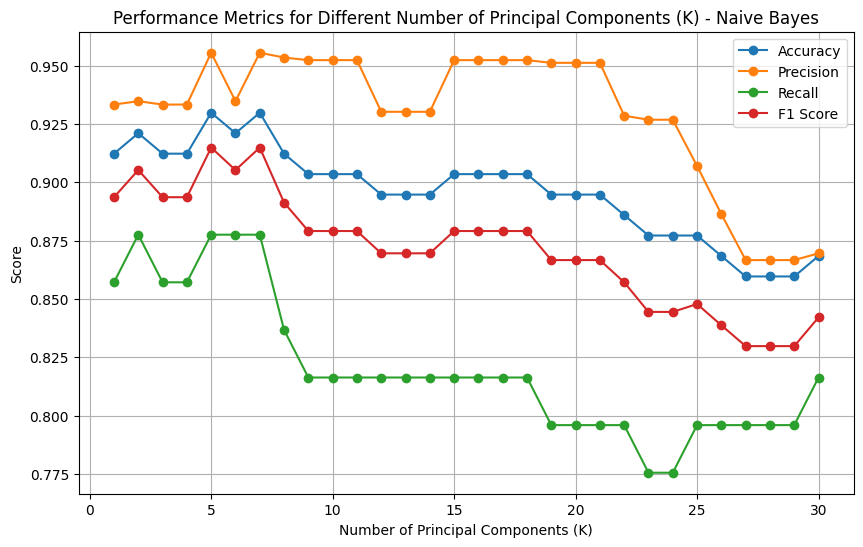

Best number of principal components (K) for highest accuracy using Naive Bayes: 5

Comparison of Naive Bayes (Problem 5) with Logistic Regression (Problem 2), Naive Bayes (Problem 3), and Logistic Regression with PCA (Problem 4):
Highest Accuracy with Naive Bayes and PCA: 0.9298245614035088
Logistic Regression Accuracy (Problem 2): 0.9736842105263158
Naive Bayes Accuracy (Problem 3): 0.868421052631579
Logistic Regression with PCA Accuracy (Problem 4): 0.9736842105263158


In [ ]:
# Step 1: Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 2: Define the range of K values for PCA (from 1 to the number of features)
K_values = range(1, X_train_cancer_scaled.shape[1] + 1)

# Step 3: Initialize lists to store performance metrics for different K values
accuracy_list_nb = []
precision_list_nb = []
recall_list_nb = []
f1_list_nb = []

# Step 4: Loop through different values of K for PCA and train the Naive Bayes model
for K in K_values:
    # Apply PCA for K components
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train_cancer_scaled)
    X_test_pca = pca.transform(X_test_cancer_scaled)

    # Build and train a Naive Bayes model
    nb_model = GaussianNB()
    nb_model.fit(X_train_pca, y_train_cancer)

    # Make predictions on the test set
    y_pred_nb = nb_model.predict(X_test_pca)

    # Calculate performance metrics
    accuracy_nb = accuracy_score(y_test_cancer, y_pred_nb)
    precision_nb = precision_score(y_test_cancer, y_pred_nb)
    recall_nb = recall_score(y_test_cancer, y_pred_nb)
    f1_nb = f1_score(y_test_cancer, y_pred_nb)

    # Store the metrics in the lists
    accuracy_list_nb.append(accuracy_nb)
    precision_list_nb.append(precision_nb)
    recall_list_nb.append(recall_nb)
    f1_list_nb.append(f1_nb)

# Step 5: Plot the performance metrics for different values of K
plt.figure(figsize=(10, 6))
plt.plot(K_values, accuracy_list_nb, marker='o', label='Accuracy')
plt.plot(K_values, precision_list_nb, marker='o', label='Precision')
plt.plot(K_values, recall_list_nb, marker='o', label='Recall')
plt.plot(K_values, f1_list_nb, marker='o', label='F1 Score')
plt.title("Performance Metrics for Different Number of Principal Components (K) - Naive Bayes")
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Identify the best K with the highest accuracy
best_K_nb = K_values[accuracy_list_nb.index(max(accuracy_list_nb))]
print(f"Best number of principal components (K) for highest accuracy using Naive Bayes: {best_K_nb}")

# Step 7: Compare the results with Problems 2, 3, and 4
print("\nComparison of Naive Bayes (Problem 5) with Logistic Regression (Problem 2), Naive Bayes (Problem 3), and Logistic Regression with PCA (Problem 4):")
print(f"Highest Accuracy with Naive Bayes and PCA: {max(accuracy_list_nb)}")
print(f"Logistic Regression Accuracy (Problem 2): {accuracy_cancer}")
print(f"Naive Bayes Accuracy (Problem 3): {accuracy_nb}")
print(f"Logistic Regression with PCA Accuracy (Problem 4): {max(accuracy_list)}")


In [ ]:
# Get the best K for Naive Bayes (highest accuracy)
best_K_nb = K_values[accuracy_list_nb.index(max(accuracy_list_nb))]

# Retrieve the classification metrics for the best K
best_accuracy_nb = accuracy_list_nb[best_K_nb - 1]  # K starts at 1, so we subtract 1 to get the right index
best_precision_nb = precision_list_nb[best_K_nb - 1]
best_recall_nb = recall_list_nb[best_K_nb - 1]
best_f1_nb = f1_list_nb[best_K_nb - 1]

# Print the best metrics for Problem 5 (Naive Bayes with PCA)
print(f"Best number of principal components (K) for Naive Bayes: {best_K_nb}")
print(f"Classification Accuracy: {best_accuracy_nb}")
print(f"Precision: {best_precision_nb}")
print(f"Recall: {best_recall_nb}")
print(f"F1 Score: {best_f1_nb}")


Best number of principal components (K) for Naive Bayes: 5
Classification Accuracy: 0.9298245614035088
Precision: 0.9555555555555556
Recall: 0.8775510204081632
F1 Score: 0.9148936170212766
